Dataset 'wildfires.csv' carregado com sucesso.
Número inicial de registros (linhas): 2303566

Número inicial de registros (linhas): 2303566

 Duplicatas removidas. Contagem de registros únicos: 2303566.
 Registros com datas inválidas foram removidos. Contagem atual: 1408753 registros.

--- Sumário de Valores Ausentes Antes do Tratamento ---
FOD_ID                            0
FIRE_NAME                    398012
FIRE_YEAR                         0
DISCOVERY_DATE                    0
DISCOVERY_DOY                     0
NWCG_CAUSE_CLASSIFICATION         0
NWCG_GENERAL_CAUSE                0
CONT_DATE                         0
CONT_DOY                          0
FIRE_SIZE                         0
FIRE_SIZE_CLASS                   0
LATITUDE                          0
LONGITUDE                         0
STATE                             0
dtype: int64

--- Sumário de Valores Ausentes Após o Tratamento ---
FOD_ID                            0
FIRE_NAME                    398012
FIRE_YEAR    

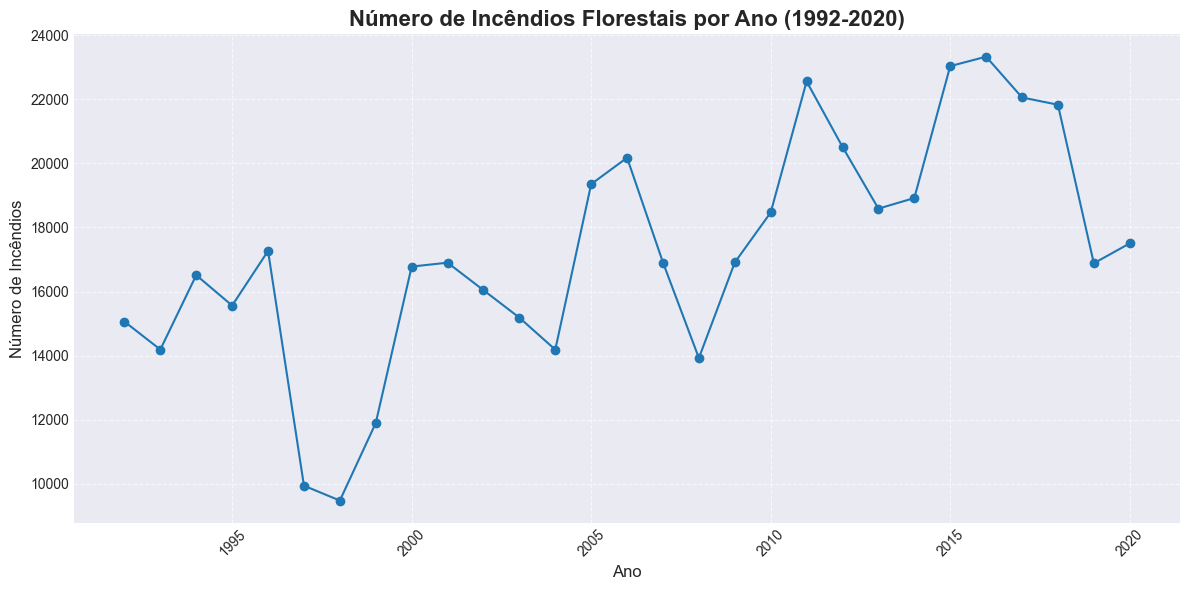

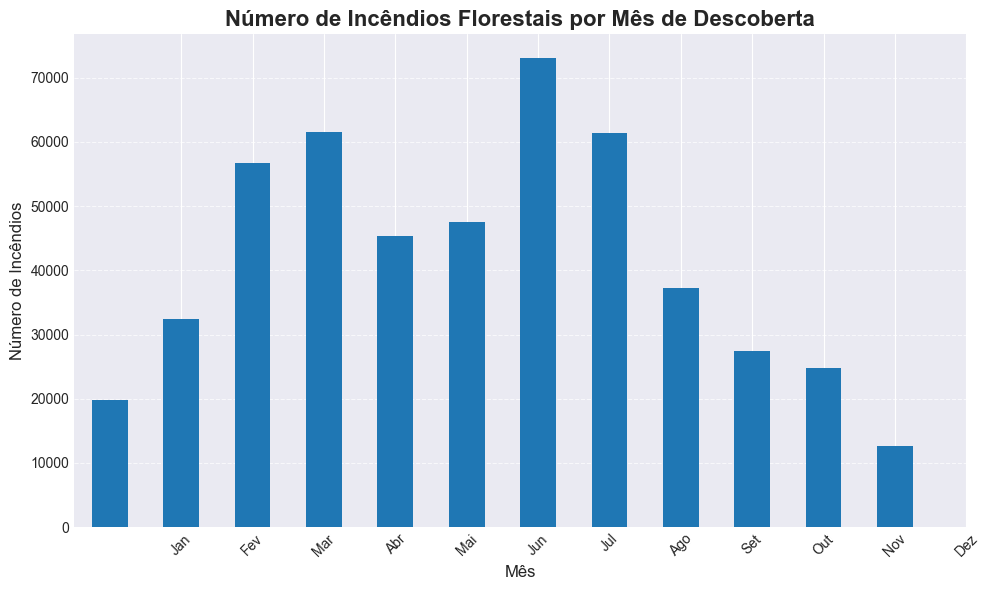

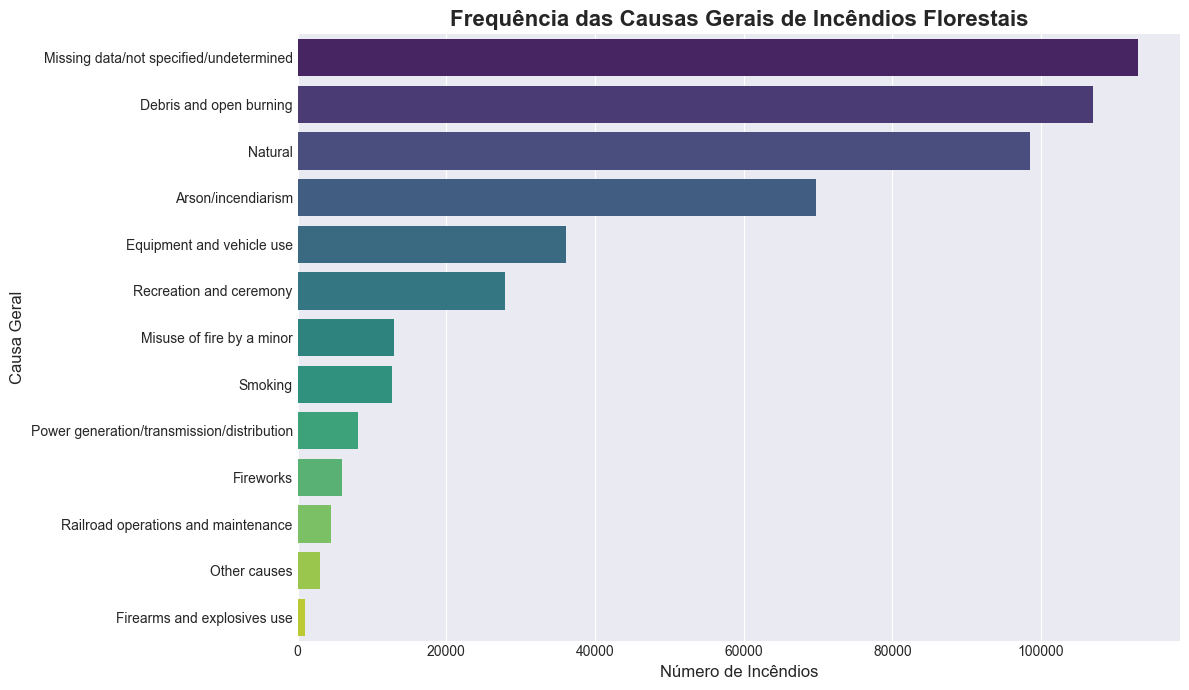

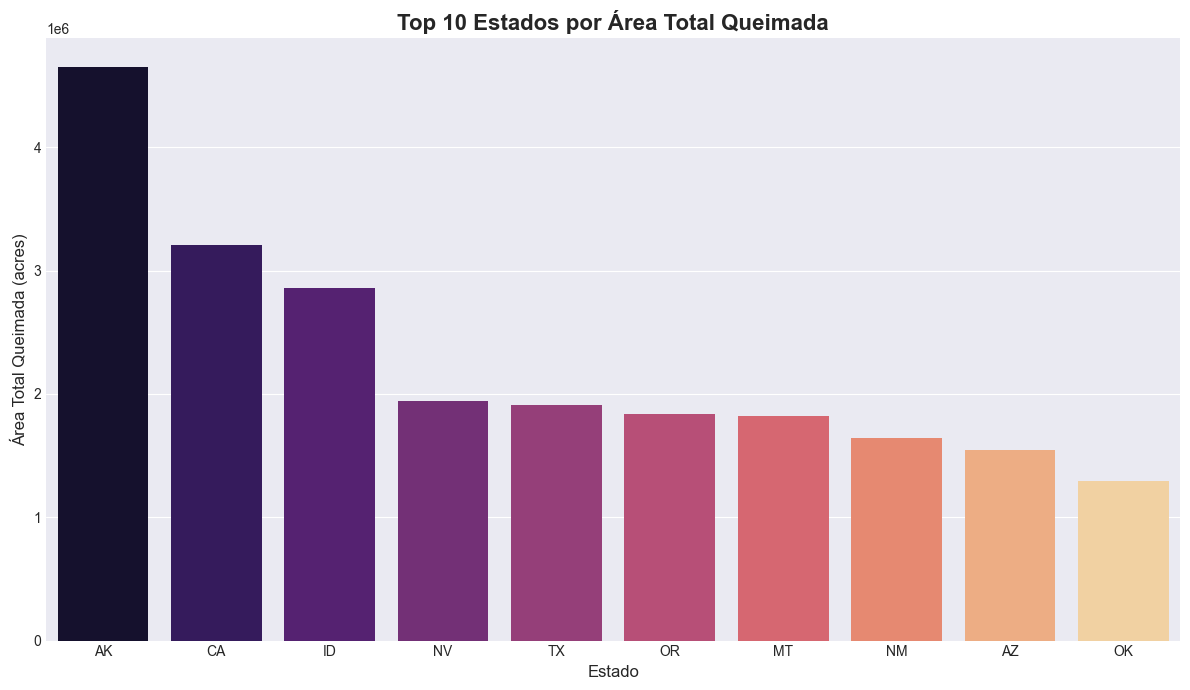


 Todos os gráficos foram gerados com sucesso!

           SEÇÃO: TESTES DE HIPÓTESES           


--- 1. Intervalos de Confiança para a Média da Área Queimada ---

Intervalos de Confiança por Classificação de Causa:
Causa: Natural, Média: 174.76, IC 95%: (165.70, 183.81)
Causa: Human, Média: 34.42, IC 95%: (32.72, 36.13)
Causa: Missing data/not specified/undetermined, Média: 34.89, IC 95%: (28.53, 41.25)

Intervalos de Confiança por Estado:
Estado: UT, Média: 103.34, IC 95%: (85.76, 120.92)
Estado: CA, Média: 67.84, IC 95%: (59.74, 75.94)
Estado: AZ, Média: 46.28, IC 95%: (39.14, 53.42)
Estado: MT, Média: 121.95, IC 95%: (103.29, 140.60)
Estado: LA, Média: 40.37, IC 95%: (30.20, 50.53)
Estado: SD, Média: 38.13, IC 95%: (25.88, 50.39)
Estado: TX, Média: 183.23, IC 95%: (157.96, 208.49)
Estado: WV, Média: 27.27, IC 95%: (23.79, 30.75)
Estado: MO, Média: 24.33, IC 95%: (21.65, 27.02)
Estado: NY, Média: 0.83, IC 95%: (0.76, 0.90)
Estado: OR, Média: 73.65, IC 95%: (62.10, 85.20)
Estado: ME

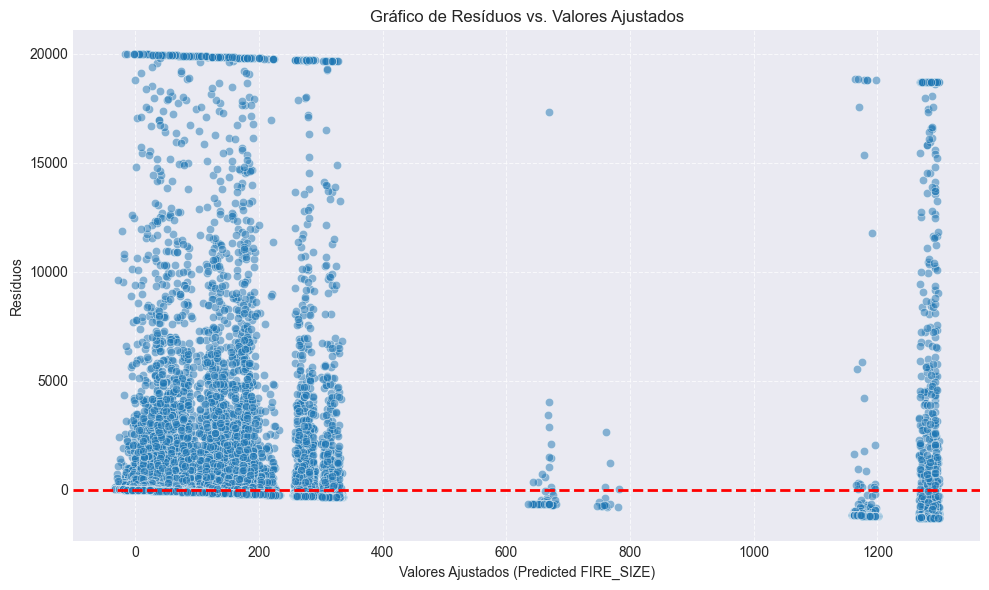

Este gráfico ajuda a verificar a **homoscedasticidade** (variância constante dos resíduos) e a **linearidade** da relação. Pontos dispersos aleatoriamente em torno de zero (a linha vermelha) indicam um bom ajuste do modelo. Padrões visíveis (como um formato de funil ou curva) sugerem violações dos pressupostos do modelo.



<Figure size 800x600 with 0 Axes>

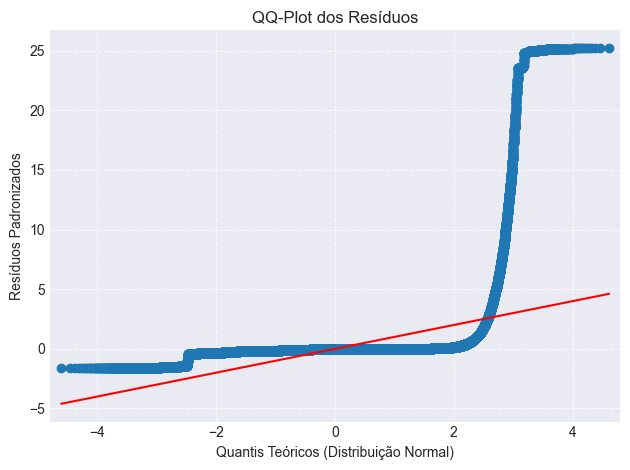

O **QQ-Plot** verifica a **normalidade dos resíduos**. Se os pontos seguirem de perto a linha diagonal vermelha, os resíduos são aproximadamente distribuídos normalmente, o que é um pressuposto importante para a inferência em modelos de regressão linear.



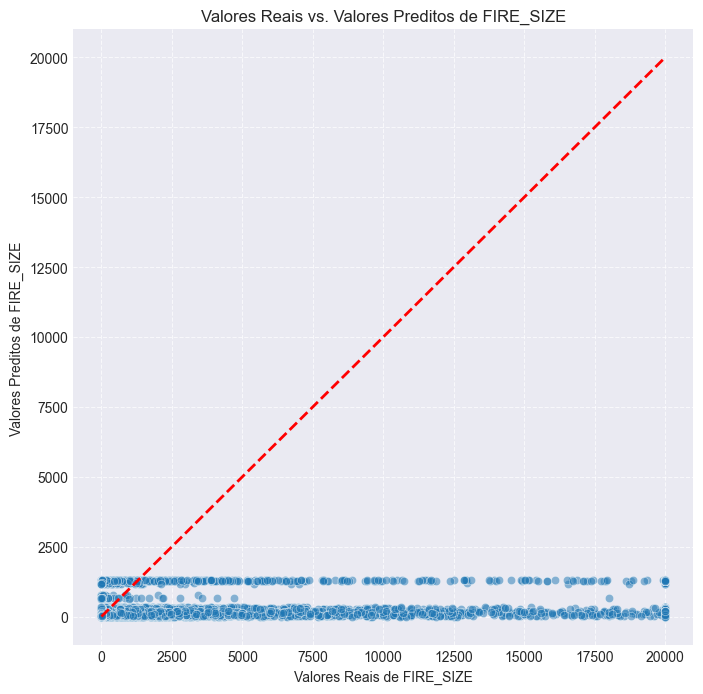

Este gráfico mostra a correlação entre os **valores reais** e os **valores preditos** pelo modelo. Quanto mais próximos os pontos estiverem da linha diagonal vermelha (onde Y=X), melhor o poder preditivo do modelo.


          FIM DA SEÇÃO: MODELO DE REGRESSÃO         




Mapas de concentração de incêndios por estado gerados com sucesso.


In [2]:
# ==============================================================================
# SEÇÃO 1: CONFIGURAÇÃO INICIAL E IMPORTAÇÃO DE BIBLIOTECAS
# ==============================================================================

# Importação das bibliotecas essenciais para a análise de dados,
# visualização, estatísticas e modelagem.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import warnings
import plotly.express as px

# Suprime avisos para uma saída mais limpa no console.
warnings.filterwarnings('ignore')


# ==============================================================================
# SEÇÃO 2: CARREGAMENTO E PRÉ-PROCESSAMENTO DOS DADOS
# ==============================================================================

def load_and_preprocess_data(file_path='wildfires.csv', sample_size=500000, random_seed=6):
    """
    Carrega, limpa e pré-processa o conjunto de dados de incêndios florestais.
    Ao final, extrai uma amostra aleatória para otimizar a performance da análise.

    Args:
        file_path (str): Caminho para o arquivo CSV.
        sample_size (int): Número de registros desejado para a amostra.
        random_seed (int): Semente para garantir a reprodutibilidade da amostragem.

    Returns:
        pd.DataFrame: DataFrame amostrado e pronto para análise.
    """
    # Tenta carregar o dataset. Se o arquivo não for encontrado, cria um
    # DataFrame de exemplo para que o script não pare.
    try:
        df = pd.read_csv(file_path)
        print(f"Dataset '{file_path}' carregado com sucesso.")
        print(f"Número inicial de registros (linhas): {len(df)}")
    except FileNotFoundError:
        print(f"Erro: O arquivo '{file_path}' não foi encontrado. Usando um DataFrame de exemplo.")
        data = {
            'FOD_ID': range(1000), 'FIRE_NAME': [f'Fire{i}' for i in range(1000)],
            'FIRE_YEAR': np.random.randint(1992, 2021, 1000),
            'DISCOVERY_DATE': pd.to_datetime(np.random.randint(pd.Timestamp('1992-01-01').value, pd.Timestamp('2020-12-31').value, 1000)),
            'DISCOVERY_DOY': np.random.randint(1, 366, 1000),
            'NWCG_CAUSE_CLASSIFICATION': np.random.choice(['Natural', 'Human', 'Missing data/not specified/undetermined'], 1000),
            'NWCG_GENERAL_CAUSE': np.random.choice(['Lightning', 'Equipment Use', 'Arson/incendiarism'], 1000),
            'CONT_DATE': pd.to_datetime(np.random.randint(pd.Timestamp('1992-01-01').value, pd.Timestamp('2020-12-31').value, 1000)),
            'CONT_DOY': np.random.randint(1, 366, 1000),
            'FIRE_SIZE': np.random.rand(1000) * 20000,
            'FIRE_SIZE_CLASS': np.random.choice(list('ABCDEFG'), 1000),
            'LATITUDE': np.random.uniform(25, 49, 1000),
            'LONGITUDE': np.random.uniform(-125, -67, 1000),
            'STATE': np.random.choice(['CA', 'GA', 'AZ', 'NY', 'OR'], 1000)
        }
        df = pd.DataFrame(data)

    # --- Início da Limpeza dos Dados ---
    print(f"\nNúmero inicial de registros (linhas): {len(df)}")

    # 1. Remoção de Duplicatas
    df_cleaned = df.drop_duplicates()
    print(f"\n Duplicatas removidas. Contagem de registros únicos: {len(df_cleaned)}.")

    # 2. Conversão e Limpeza de Datas
    df_cleaned['DISCOVERY_DATE'] = pd.to_datetime(df_cleaned['DISCOVERY_DATE'], errors='coerce')
    df_cleaned['CONT_DATE'] = pd.to_datetime(df_cleaned['CONT_DATE'], errors='coerce')
    df_cleaned.dropna(subset=['DISCOVERY_DATE', 'CONT_DATE'], inplace=True)
    print(f" Registros com datas inválidas foram removidos. Contagem atual: {len(df_cleaned)} registros.")

    # 3. Tratamento de Valores Ausentes (NaN)
    print("\n--- Sumário de Valores Ausentes Antes do Tratamento ---")
    print(df_cleaned.isnull().sum())

    # Preenche valores nulos com base em suposições lógicas ou categorias padrão.
    df_cleaned['CONT_DATE'].fillna(df_cleaned['DISCOVERY_DATE'], inplace=True)
    df_cleaned['CONT_DOY'].fillna(df_cleaned['DISCOVERY_DOY'], inplace=True)
    df_cleaned['NWCG_CAUSE_CLASSIFICATION'].fillna('Missing data/not specified/undetermined', inplace=True)
    df_cleaned['NWCG_GENERAL_CAUSE'].fillna('Missing data/not specified/undetermined', inplace=True)
    df_cleaned.dropna(subset=['FIRE_SIZE', 'LATITUDE', 'LONGITUDE', 'STATE', 'FIRE_YEAR', 'DISCOVERY_DOY'], inplace=True)

    print("\n--- Sumário de Valores Ausentes Após o Tratamento ---")
    print(df_cleaned.isnull().sum())

    # 4. Tratamento de Outliers (Valores Extremos)
    df_cleaned['FIRE_SIZE'] = pd.to_numeric(df_cleaned['FIRE_SIZE'], errors='coerce')
    df_cleaned.dropna(subset=['FIRE_SIZE'], inplace=True)
    
    # Limita o tamanho do incêndio ao quantil 99.9 para reduzir o efeito de outliers.
    upper_bound_fire_size = df_cleaned['FIRE_SIZE'].quantile(0.999)
    df_cleaned['FIRE_SIZE'] = np.where(df_cleaned['FIRE_SIZE'] > upper_bound_fire_size, upper_bound_fire_size, df_cleaned['FIRE_SIZE'])
    print(f"\n O tamanho dos incêndios (FIRE_SIZE) foi ajustado. Valores acima de {upper_bound_fire_size:,.2f} acres foram limitados a este patamar.")

    # Garante que não há valores negativos para o tamanho do incêndio.
    df_cleaned = df_cleaned[df_cleaned['FIRE_SIZE'] >= 0]
    print(f" O processo de tratamento de dados foi concluído. O conjunto de dados agora possui {len(df_cleaned)} registros preparados para análise.")

    # 5. Amostragem Aleatória
    if len(df_cleaned) > sample_size:
        df_sample = df_cleaned.sample(n=sample_size, random_state=random_seed, replace=False)
        print(f"\n Amostra de {len(df_sample)} observações selecionada com sucesso (semente utilizada: {random_seed}).")
    else:
        df_sample = df_cleaned.copy()

    return df_sample


# ==============================================================================
# SEÇÃO 3: ANÁLISE EXPLORATÓRIA DE DADOS
# ==============================================================================

def justify_sample_validity(df_sample):
    """Imprime a justificativa estatística para o uso da amostra."""
    print("\n--- Justificativa da Validade da Amostra ---")
    print("Uma **amostra aleatória simples** foi cuidadosamente selecionada para assegurar a representatividade da população original de dados.")
    print(f"Com um tamanho de **{len(df_sample)} observações**, esta amostra é considerada suficientemente grande para permitir a aplicação do **Teorema Central do Limite**.")
    print("A aplicação deste teorema valida o uso de métodos de inferência estatística, como a construção de intervalos de confiança e a realização de testes de hipóteses, com resultados robustos e confiáveis.")
    print("A seleção 'sem reposição' é uma prática importante, pois garante que cada registro da população seja incluído no máximo uma vez na amostra, evitando vieses e duplicação de informações na amostra.")
    print("---\n")

def perform_initial_statistical_summaries(df_sample):
    """Calcula e exibe as principais estatísticas descritivas da amostra."""
    print("\n--- Resumos Estatísticos Iniciais para a Amostra ---")
    print("\nEstatísticas para variáveis numéricas principais:")
    print(df_sample[['FIRE_SIZE', 'FIRE_YEAR', 'DISCOVERY_DOY', 'CONT_DOY']].describe())
    print("\nContagem de causas de incêndio (NWCG_CAUSE_CLASSIFICATION):")
    print(df_sample['NWCG_CAUSE_CLASSIFICATION'].value_counts())
    print("\nTop 10 causas gerais de incêndio (NWCG_GENERAL_CAUSE):")
    print(df_sample['NWCG_GENERAL_CAUSE'].value_counts().head(10))
    print("\nDistribuição dos incêndios por classe de tamanho (FIRE_SIZE_CLASS):")
    print(df_sample['FIRE_SIZE_CLASS'].value_counts())
    print("\nTop 10 estados com mais incêndios:")
    print(df_sample['STATE'].value_counts().head(10))
    print("\nBottom 10 estados com menos incêndios:")
    print(df_sample['STATE'].value_counts().tail(10))

def analyze_temporal_trends(df_sample):
    """Analisa e exibe as tendências temporais dos incêndios."""
    print("\n--- Tendências Temporais de Incêndios ---")
    incendios_por_ano = df_sample['FIRE_YEAR'].value_counts().sort_index()
    print("\nNúmero de incêndios por ano (visão inicial e final do período):")
    print(incendios_por_ano.head())
    print("...")
    print(incendios_por_ano.tail())
    df_sample['DISCOVERY_MONTH'] = df_sample['DISCOVERY_DATE'].dt.month
    print("\nNúmero de incêndios por mês de descoberta (sazonalidade):")
    print(df_sample['DISCOVERY_MONTH'].value_counts().sort_index())

def generate_descriptive_plots(df_sample):
    """Gera gráficos para a visualização dos padrões nos dados."""
    print("\n--- Iniciando a Geração de Gráficos ---")
    plt.style.use('seaborn-v0_8-darkgrid')

    # Gráfico 1: Tendência de incêndios ao longo dos anos.
    plt.figure(figsize=(12, 6))
    df_sample['FIRE_YEAR'].value_counts().sort_index().plot(kind='line', marker='o')
    plt.title('Número de Incêndios Florestais por Ano (1992-2020)', fontsize=16, fontweight='bold')
    plt.xlabel('Ano', fontsize=12)
    plt.ylabel('Número de Incêndios', fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

    # Gráfico 2: Sazonalidade dos incêndios (por mês).
    plt.figure(figsize=(10, 6))
    df_sample['DISCOVERY_MONTH'].value_counts().sort_index().plot(kind='bar')
    plt.title('Número de Incêndios Florestais por Mês de Descoberta', fontsize=16, fontweight='bold')
    plt.xlabel('Mês', fontsize=12)
    plt.ylabel('Número de Incêndios', fontsize=12)
    plt.xticks(ticks=range(1, 13), labels=['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'], rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

    # Gráfico 3: Frequência das causas gerais de incêndios.
    plt.figure(figsize=(12, 7))
    sns.countplot(data=df_sample, y='NWCG_GENERAL_CAUSE', order=df_sample['NWCG_GENERAL_CAUSE'].value_counts().index, palette='viridis')
    plt.title('Frequência das Causas Gerais de Incêndios Florestais', fontsize=16, fontweight='bold')
    plt.xlabel('Número de Incêndios', fontsize=12)
    plt.ylabel('Causa Geral', fontsize=12)
    plt.tight_layout()
    plt.show()

    # Gráfico 4: Top 10 estados com maior área total queimada.
    plt.figure(figsize=(12, 7))
    total_area_by_state = df_sample.groupby('STATE')['FIRE_SIZE'].sum().sort_values(ascending=False).head(10)
    sns.barplot(x=total_area_by_state.index, y=total_area_by_state.values, palette='magma')
    plt.title('Top 10 Estados por Área Total Queimada', fontsize=16, fontweight='bold')
    plt.xlabel('Estado', fontsize=12)
    plt.ylabel('Área Total Queimada (acres)', fontsize=12)
    plt.tight_layout()
    plt.show()
    print("\n Todos os gráficos foram gerados com sucesso!")


# ==============================================================================
# SEÇÃO 4: ANÁLISE INFERENCIAL E TESTES DE HIPÓTESES
# ==============================================================================

def run_hypothesis_tests(df_sample):
    """Executa testes de hipóteses para validar diferenças entre grupos."""
    print("\n" + "="*50)
    print("           SEÇÃO: TESTES DE HIPÓTESES           ")
    print("="*50 + "\n")

    # --- Teste 1: Intervalos de Confiança ---
    print("\n--- 1. Intervalos de Confiança para a Média da Área Queimada ---")

    def calculate_confidence_interval(subset, group_name, group_value):
        """Calcula e imprime o intervalo de confiança para a média."""
        if len(subset) > 1:
            mean, std_err = subset.mean(), stats.sem(subset)
            if std_err > 0:
                interval = stats.t.interval(0.95, len(subset)-1, loc=mean, scale=std_err)
                print(f"{group_name}: {group_value}, Média: {mean:.2f}, IC 95%: ({interval[0]:.2f}, {interval[1]:.2f})")

    print("\nIntervalos de Confiança por Classificação de Causa:")
    for cause in df_sample['NWCG_CAUSE_CLASSIFICATION'].unique():
        if pd.notna(cause):
            calculate_confidence_interval(df_sample[df_sample['NWCG_CAUSE_CLASSIFICATION'] == cause]['FIRE_SIZE'], "Causa", cause)

    print("\nIntervalos de Confiança por Estado:")
    for state in df_sample['STATE'].unique():
        if pd.notna(state):
            calculate_confidence_interval(df_sample[df_sample['STATE'] == state]['FIRE_SIZE'], "Estado", state)

    # --- Teste 2: Teste T para Causas Naturais vs. Humanas ---
    print("\n--- 2. Teste de Hipóteses: Causas Naturais vs. Humanas ---")
    print("Objetivo: Verificar se há diferença significativa na média da área queimada entre incêndios de causas naturais e humanas.")
    print("Hipótese Nula ($H_0$): A média da área queimada para causas naturais é igual à de causas humanas.")
    print("Hipótese Alternativa ($H_a$): A média da área queimada para causas naturais é diferente da de causas humanas.\\n")
    
    natural_fires = df_sample[df_sample['NWCG_CAUSE_CLASSIFICATION'] == 'Natural']['FIRE_SIZE'].dropna()
    human_fires = df_sample[df_sample['NWCG_CAUSE_CLASSIFICATION'] == 'Human']['FIRE_SIZE'].dropna()

    if len(natural_fires) > 1 and len(human_fires) > 1:
        t_stat, p_value = stats.ttest_ind(natural_fires, human_fires, equal_var=False)
        print(f"Estatística T: {t_stat:.2f}, P-valor: {p_value:.3f}")
        if p_value < 0.05:
            print("Conclusão: Rejeitamos a hipótese nula (p < 0.05). Há uma diferença significativa na média da área queimada entre causas naturais e humanas.")

    # --- Teste 3: ANOVA para Classificação de Causa ---
    print("\n--- 3. Teste de Hipóteses (ANOVA) para NWCG_CAUSE_CLASSIFICATION ---")
    print("Objetivo: Verificar se há diferença significativa na média da área queimada (FIRE_SIZE) entre as diferentes classificações de causa de incêndio.")
    print("Hipótese Nula ($H_0$): As médias de FIRE_SIZE são iguais para todas as classificações de causa.")
    print("Hipótese Alternativa ($H_a$): Pelo menos uma média de FIRE_SIZE é diferente.\\n")
    
    formula_anova = 'FIRE_SIZE ~ C(NWCG_CAUSE_CLASSIFICATION)'
    anova_model = ols(formula_anova, data=df_sample).fit()
    anova_table = sm.stats.anova_lm(anova_model, typ=2)
    print(anova_table)
    
    p_value_anova = anova_table['PR(>F)'][0]
    print(f"\nP-valor da ANOVA: {p_value_anova:.4f}")
    if p_value_anova < 0.05:
        print("Conclusão: Rejeitamos a hipótese nula (p < 0.05). Há uma diferença estatisticamente significativa na média do tamanho do incêndio entre as classificações de causa.")

    print("\n" + "="*50)
    print("          FIM DA SEÇÃO: TESTES DE HIPÓTESES         ")
    print("="*50 + "\n")


# ==============================================================================
# SEÇÃO 5: MODELAGEM PREDITIVA - REGRESSÃO LINEAR
# ==============================================================================

def run_regression_model(df_sample):
    """Constrói, analisa e visualiza um modelo de regressão linear múltipla."""
    print("\n" + "="*50)
    print("         SEÇÃO: MODELO DE REGRESSÃO          ")
    print("="*50 + "\n")

    # Preparação dos dados para o modelo.
    df_model = df_sample[['FIRE_SIZE', 'FIRE_YEAR', 'DISCOVERY_DOY', 'NWCG_CAUSE_CLASSIFICATION', 'STATE']].dropna().copy()
    df_model['NWCG_CAUSE_CLASSIFICATION'] = df_model['NWCG_CAUSE_CLASSIFICATION'].astype('category')
    df_model['STATE'] = df_model['STATE'].astype('category')

    print("\n--- Modelo de Regressão Linear Múltipla para FIRE_SIZE ---")
    print("Objetivo: Construir um modelo de regressão para estimar o tamanho do incêndio (FIRE_SIZE) com base em variáveis como ano, dia do ano de descoberta, classificação da causa e estado.")
    print("Variável Dependente (Y): FIRE_SIZE (Área Afetada em acres)")
    print("Variáveis Independentes (X): FIRE_YEAR, DISCOVERY_DOY, NWCG_CAUSE_CLASSIFICATION, STATE\n")

    # Definição e ajuste do modelo de regressão.
    formula_reg = 'FIRE_SIZE ~ FIRE_YEAR + DISCOVERY_DOY + C(NWCG_CAUSE_CLASSIFICATION) + C(STATE)'
    model_reg = ols(formula_reg, data=df_model).fit()
    
    print("\nSumário do Modelo de Regressão:")
    print(model_reg.summary())

    print("\n--- Gráficos Diagnósticos do Modelo de Regressão ---")

    # Gráfico 1: Resíduos vs. Valores Ajustados (Verifica homoscedasticidade).
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=model_reg.fittedvalues, y=model_reg.resid, alpha=0.5)
    plt.axhline(y=0, color='r', linestyle='--', linewidth=2)
    plt.title('Gráfico de Resíduos vs. Valores Ajustados')
    plt.xlabel('Valores Ajustados (Predicted FIRE_SIZE)')
    plt.ylabel('Resíduos')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
    print("Este gráfico ajuda a verificar a **homoscedasticidade** (variância constante dos resíduos) e a **linearidade** da relação. Pontos dispersos aleatoriamente em torno de zero (a linha vermelha) indicam um bom ajuste do modelo. Padrões visíveis (como um formato de funil ou curva) sugerem violações dos pressupostos do modelo.\n")

    # Gráfico 2: QQ-Plot (Verifica a normalidade dos resíduos).
    plt.figure(figsize=(8, 6))
    sm.qqplot(model_reg.resid, line='s', fit=True)
    plt.title('QQ-Plot dos Resíduos')
    plt.xlabel('Quantis Teóricos (Distribuição Normal)')
    plt.ylabel('Resíduos Padronizados')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
    print("O **QQ-Plot** verifica a **normalidade dos resíduos**. Se os pontos seguirem de perto a linha diagonal vermelha, os resíduos são aproximadamente distribuídos normalmente, o que é um pressuposto importante para a inferência em modelos de regressão linear.\n")

    # Gráfico 3: Valores Reais vs. Valores Preditos (Avalia o poder preditivo).
    plt.figure(figsize=(8, 8))
    sns.scatterplot(x=df_model['FIRE_SIZE'], y=model_reg.fittedvalues, alpha=0.5)
    max_val = max(df_model['FIRE_SIZE'].max(), model_reg.fittedvalues.max())
    plt.plot([0, max_val], [0, max_val], color='red', linestyle='--', linewidth=2)
    plt.title('Valores Reais vs. Valores Preditos de FIRE_SIZE')
    plt.xlabel('Valores Reais de FIRE_SIZE')
    plt.ylabel('Valores Preditos de FIRE_SIZE')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()
    print("Este gráfico mostra a correlação entre os **valores reais** e os **valores preditos** pelo modelo. Quanto mais próximos os pontos estiverem da linha diagonal vermelha (onde Y=X), melhor o poder preditivo do modelo.\n")
    
    print("\n" + "="*50)
    print("          FIM DA SEÇÃO: MODELO DE REGRESSÃO         ")
    print("="*50 + "\n")


# ==============================================================================
# SEÇÃO 6: VISUALIZAÇÃO GEOGRÁFICA DE DADOS
# ==============================================================================

def generate_choropleth_maps(df_sample):
    """Gera mapas coropléticos para visualizar a distribuição geográfica dos incêndios."""
    # Agrega os dados por estado para contagem e área total queimada.
    state_fire_data = df_sample.groupby('STATE').agg(
        FIRE_COUNT=('FOD_ID', 'count'),
        TOTAL_FIRE_SIZE=('FIRE_SIZE', 'sum')
    ).reset_index().rename(columns={'STATE': 'STATE_ABBR'})

    # Mapa 1: Concentração por número de incêndios.
    fig_count = px.choropleth(state_fire_data,
                              locations='STATE_ABBR', locationmode="USA-states",
                              color='FIRE_COUNT', scope="usa",
                              color_continuous_scale="Reds",
                              hover_name='STATE_ABBR',
                              hover_data={'FIRE_COUNT': True, 'TOTAL_FIRE_SIZE': ':.2f'},
                              title='Concentração de Incêndios Florestais por Estado nos EUA (Contagem de Incêndios)')
    fig_count.show()

    # Mapa 2: Concentração por área total queimada.
    fig_area = px.choropleth(state_fire_data,
                             locations='STATE_ABBR', locationmode="USA-states",
                             color='TOTAL_FIRE_SIZE', scope="usa",
                             color_continuous_scale="YlOrRd",
                             hover_name='STATE_ABBR',
                             hover_data={'FIRE_COUNT': True, 'TOTAL_FIRE_SIZE': ':.2f'},
                             title='Concentração de Incêndios Florestais por Estado nos EUA (Área Total Queimada)')
    fig_area.show()
    print("\nMapas de concentração de incêndios por estado gerados com sucesso.")


# ==============================================================================
# SEÇÃO 7: SEQUÊNCIA DE EXECUÇÃO DO SCRIPT
# ==============================================================================

if __name__ == "__main__":
    # Define parâmetros globais para a análise.
    random_seed = 6
    sample_size = 500000

    # Etapa 1: Carregar e preparar os dados.
    df_sample = load_and_preprocess_data(random_seed=random_seed, sample_size=sample_size)

    # Etapa 2: Realizar a análise exploratória.
    justify_sample_validity(df_sample)
    perform_initial_statistical_summaries(df_sample)
    analyze_temporal_trends(df_sample)
    generate_descriptive_plots(df_sample)

    # Etapa 3: Executar testes de hipóteses.
    run_hypothesis_tests(df_sample)

    # Etapa 4: Construir e avaliar o modelo de regressão.
    run_regression_model(df_sample)
    
    # Etapa 5: Gerar visualizações geográficas.
    generate_choropleth_maps(df_sample)